<a href="https://colab.research.google.com/github/alexlorenzo/Pet.my/blob/master/Image_Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Multiclassification

<img src="https://octodex.github.com/images/trekkie.png" alt="Kit" title="Cat" width="300" height="300" />
*(image from octodex github)*

Import Images

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls '/content/gdrive/My Drive/Colab Notebooks/'

'Copy of Welcome To Colaboratory'   images.zip	 train
'Image Multiclassification.ipynb'   test	 validation


In [0]:
!unzip '/content/gdrive/My Drive/Colab Notebooks/images.zip' -d data #Create the unzip folder data

Archive:  /content/gdrive/My Drive/Colab Notebooks/images.zip
   creating: data/images/
   creating: data/images/test/
  inflating: data/images/test/000c21f80-1.jpg  
  inflating: data/images/test/000c21f80-2.jpg  
  inflating: data/images/test/000c21f80-3.jpg  
  inflating: data/images/test/001d503e8-1.jpg  
  inflating: data/images/test/001ec8d5b-1.jpg  
  inflating: data/images/test/001ec8d5b-2.jpg  
  inflating: data/images/test/001ec8d5b-3.jpg  
  inflating: data/images/test/001ec8d5b-4.jpg  
  inflating: data/images/test/001ec8d5b-5.jpg  
  inflating: data/images/test/002d58f95-1.jpg  
  inflating: data/images/test/002d58f95-10.jpg  
  inflating: data/images/test/002d58f95-11.jpg  
  inflating: data/images/test/002d58f95-12.jpg  
  inflating: data/images/test/002d58f95-13.jpg  
  inflating: data/images/test/002d58f95-14.jpg  
  inflating: data/images/test/002d58f95-2.jpg  
  inflating: data/images/test/002d58f95-3.jpg  
  inflating: data/images/test/002d58f95-4.jpg  
  inflating:

Check tensorflow is correctly imported

In [0]:
import tensorflow as tf

#Creating TensorFlow object 
hello_constant = tf.constant('Hello World!', name = 'hello_constant')
#Creating a session object for execution of the computational graph
with tf.Session() as sess:
    #Implementing the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


## Step 1 - Loading the required packages

In [0]:
!pip install -q keras

In [0]:
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


96116736/96112376 [==============================] - 1s 0us/step


In [0]:
 import numpy as np  
 from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
 from keras.models import Sequential  
 from keras.layers import Dropout, Flatten, Dense  
 from keras import applications  
 from keras.utils.np_utils import to_categorical  
 import matplotlib.pyplot as plt  
 import math  
 import cv2  

In [0]:
train_data_dir = "data/images/train"
validation_data_dir = "data/images/validation/"


# CNN 

In [0]:
# dimensions of our images.  
img_width, img_height = 32, 32  
   
top_model_weights_path = 'bottleneck_fc_model.h5'  
    
# number of epochs to train top model  
epochs = 50  
# batch size used by flow_from_directory and predict_generator  
batch_size = 16  

In [0]:
model = applications.VGG16(include_top=False, weights='imagenet') 

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
datagen = ImageDataGenerator(rescale=1. / 255)  
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = model.predict_generator(  
    generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)  

Found 11721 images belonging to 5 classes.


In [0]:
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
  
bottleneck_features_validation = model.predict_generator(  
    generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation)  

Found 2931 images belonging to 5 classes.


In [0]:
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)  

Found 11721 images belonging to 5 classes.


In [0]:
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
  
validation_data = np.load('bottleneck_features_validation.npy')  
   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 2931 images belonging to 5 classes.


In [0]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='sigmoid'))  
   
model.compile(optimizer='rmsprop',  
              loss='categorical_crossentropy', metrics=['accuracy'])  
   
history = model.fit(train_data, train_labels,  
          epochs=epochs,  
          batch_size=batch_size,  
          validation_data=(validation_data, validation_labels))  
   
model.save_weights(top_model_weights_path)  
   
(eval_loss, eval_accuracy) = model.evaluate(  
     validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 11721 samples, validate on 2931 samples
Epoch 1/50
11721/11721 [==============================] - 6s 494us/step - loss: 1.4920 - acc: 0.2740 - val_loss: 1.4797 - val_acc: 0.2750
Epoch 2/50
11721/11721 [==============================] - 4s 314us/step - loss: 1.4963 - acc: 0.2790 - val_loss: 1.4815 - val_acc: 0.2927
Epoch 3/50
11721/11721 [==============================] - 4s 314us/step - loss: 1.4970 - acc: 0.2755 - val_loss: 1.4824 - val_acc: 0.2753
Epoch 4/50
11721/11721 [==============================] - 4s 312us/step - loss: 1.4890 - acc: 0.2870 - val_loss: 1.4757 - val_acc: 0.2917
Epoch 5/50
11721/11721 [==============================] - 4s 313us/step - loss: 1.4806 - acc: 0.2938 - val_loss: 1.4815 - val_acc: 0.2883
Epoch 6/50
11721/11721 [==============================] - 4s 311us/step - loss: 1.4754 - acc: 0.29

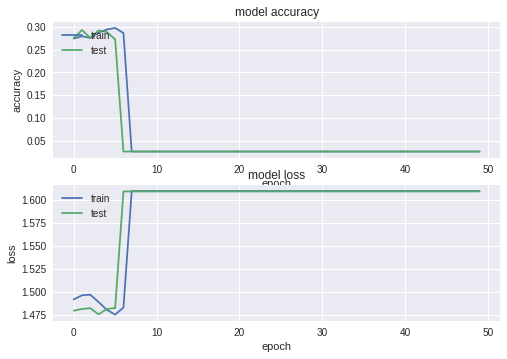

In [0]:
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  